In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([i for i in range(30,51)])
y = np.array([math.sin(i)+i*i/500 for i in x])

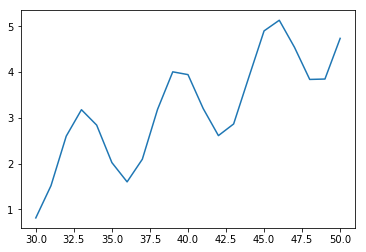

In [3]:
plt.plot(x,y)

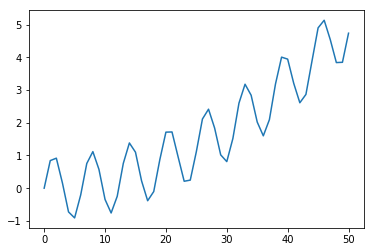

In [4]:
#the plot is a part from
plt.plot([i for i in range(51)], [math.sin(i)+i*i/500 for i in range(51)])

In [5]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1
learning_rate = 0.002

In [6]:
X_train = y[:20].reshape((1,n_steps,n_inputs))
Y_train = y[1:].reshape((1,n_steps,n_outputs))
type(X_train[0,0,0])

numpy.float64

In [150]:
tf.reset_default_graph()

X = tf.placeholder(tf.float64, [None, n_steps, n_inputs])
Y = tf.placeholder(tf.float64, [None, n_steps, n_outputs])

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu) or i in range(3)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float64)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1,n_neurons])
stacked_outputs = tf.contrib.layers.fully_connected(stacked_rnn_outputs, n_outputs, activation_fn=None)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs-Y))
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [158]:
n_iterations = 5000

with tf.Session() as sess:
    init.run()
    for i in range(n_iterations):
        training_op.run(feed_dict={X: X_train, Y: Y_train})
        if i%1000 == 0:
            print(loss.eval(feed_dict={X: X_train, Y: Y_train}))
    save = saver.save(sess, "tmp/my_model")
    predictions2 = outputs.eval(feed_dict={X: X_train, Y: Y_train})

9.76023115975
1.06953805282e-05
6.26710688297e-07
2.92839784145e-12
5.64281745749e-09


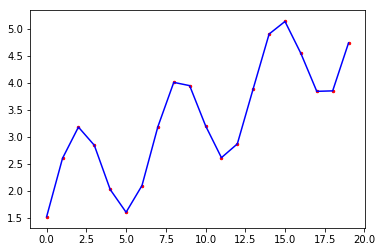

In [159]:
plt.plot([i for i in range(20)], Y_train.reshape([n_steps]), 'b')
plt.scatter([i for i in range(20)], predictions2.reshape([n_steps]), color='r', s=6)

In [160]:
sequence = Y_train.ravel().tolist()

In [161]:
with tf.Session() as sess:
    saver.restore(sess, "tmp/my_model")
    for iteration in range(100):
        y_pred = outputs.eval(feed_dict={X: np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)})
        sequence.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from tmp/my_model


Our network got the pattern of our plot and generated 100 next points

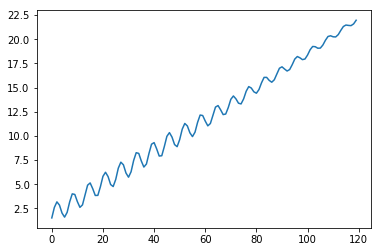

In [162]:
time = [i for i in range(len(sequence))]
plt.plot(time, sequence)

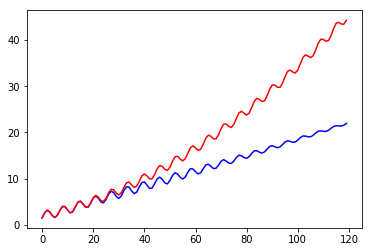

In [163]:
compare = np.array([math.sin(31+i)+(31+i)*(31+i)/500 for i in range(len(time))])
plt.plot(time, sequence, 'b')
plt.plot([i for i in range(len(compare))], compare, 'r')